# Intuit / Quicken Quickbooks Group Assignment
Class: Marketing Analytics (EWMBA263 -1)
Team: Albert Deng, Peter Pang, Alex Im, and DJ Prahladka

## 0. Data Initialization

Import data and look at the variables available

In [1]:
import pandas
import shared.mba263 as mba263
import matplotlib.pyplot as plt
import numpy as np

data = pandas.read_csv('shared/intuit.csv')
data.head(10)

,id,sex,bizflag,zip,zip_bins,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1
0,1,U,1,99999,20,1,129.5,11,1,0,0,0,0
1,2,U,1,99999,20,2,65.0,4,14,0,0,0,0
2,3,U,1,99999,20,1,24.5,13,36,1,0,0,0
3,4,U,1,99999,20,1,80.5,5,19,1,0,0,0
4,5,U,1,99999,20,1,111.0,14,7,0,0,0,0
5,6,U,1,99999,20,1,61.5,14,20,0,0,1,0
6,7,U,1,99999,20,1,56.0,5,27,0,0,1,0
7,8,U,1,99999,20,1,39.5,4,2,0,0,0,0
8,9,U,1,99999,20,1,22.0,17,1,0,0,0,1
9,10,U,1,99999,20,2,113.0,7,15,0,0,0,0


In [2]:
data.describe()

,id,bizflag,zip,zip_bins,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1
count,20000.000000,20000.000000,20000.0000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,0.244400,54350.2613,10.499000,2.079450,93.581000,15.779650,15.751400,0.208250,0.027100,0.215600,0.048050
std,5773.647028,0.429742,32776.4059,5.766755,1.246361,82.601398,9.527331,10.020435,0.406067,0.162379,0.411248,0.213877
min,1.000000,0.000000,0.0000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5000.750000,0.000000,23451.0000,5.000000,1.000000,37.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,10000.500000,0.000000,55402.5000,10.500000,2.000000,71.000000,15.000000,15.000000,0.000000,0.000000,0.000000,0.000000
75%,15000.250000,0.000000,89018.7500,15.250000,3.000000,124.500000,24.000000,24.000000,0.000000,0.000000,0.000000,0.000000
max,20000.000000,1.000000,99999.0000,20.000000,5.000000,937.500000,36.000000,36.000000,1.000000,1.000000,1.000000,1.000000


Add additional variables and define scope for evaluation

In [3]:
# Add transformational ordinal and indicator variables
data = pandas.get_dummies(data, columns=['sex'])

# Define scope for columns
variables = ['sex_B', 'sex_F', 'sex_M', 'sex_U', 'bizflag','zip_bins',
                               'numords','dollars','last','sincepurch','version1','owntaxprod','upgraded']

## 1. Run analyses
### a) Conduct RFM Analysis
Conduct both a sequential and independent RFM analysis, adding predictions on both. Begin by constructing deciles and RFM columns.

In [ ]:
# Define deciles for RFM
data['r_decile'] = mba263.ntile(data['last'], 10)
data['f_decile'] = mba263.ntile(data['numords'], 10)
data['m_decile'] = mba263.ntile(data['dollars'], 10)

# Reverse frequency and monetary deciles where we want higher first
data['f_decile'] = 9 - data['f_decile']
data['m_decile'] = 9 - data['m_decile']

# Construct RFM scores
# Start with independent RFM score
data['rfm_independent'] = data['r_decile'].astype(str) + data['f_decile'].astype(str) + data['m_decile'].astype(str)

# Construct sequential RFM score (this is placeholder)
data['rfm_sequential'] = data['rfm_independent']

Generate predictions based on RFM score, where the RFM response rate is higher than the breakeven response rate

In [20]:
# Calculate the breakeven response rate
# Import data from case as variables
num_orders = 19244
est_mailing_cost = 601366
est_gross_sales = 1154640
est_cogs = 398543

total_customers = 801821
past_purchasers = 38487 # No longer relevant, ignore
new_mailing_audience = total_customers # Sample mailing is to EVERYONE

per_person_mail_cost = est_mailing_cost / new_mailing_audience
print("Unit Mail Cost: ${:,.2f}".format(per_person_mail_cost))

per_person_avg_spend = est_gross_sales / num_orders
print("Average Spend: ${:,.2f}".format(per_person_avg_spend))

per_person_cogs = est_cogs / num_orders
print("Average COGS: ${:,.2f}".format(per_person_cogs))

# These numbers assume breakeven rate is halved
half_breakeven = per_person_mail_cost / (per_person_avg_spend - per_person_cogs)
print("\nBreakeven Rate: {:.3%}".format(half_breakeven))

Unit Mail Cost: $0.75
Average Spend: $60.00
Average COGS: $20.71

Breakeven Rate: 1.909%


### b) Logistic Regression
Run logistic regression with all variables and store in "p_logr"

In [4]:
# Predict the response rate for the 1st mail
res = mba263.logit_reg(data['res1'],data[variables])
data['p_logr']=res.predict()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.17870659963577418
            Iterations: 76
            Function evaluations: 82
            Gradient evaluations: 76


### c) Neural Network
Run a neural network on the data and make predictions in column 'p_nn'

In [5]:
result_nn = mba263.neural_network(data['res1'],data[variables])
data['p_nn'] = result_nn.predict(data[ variables ])

## 2. Evaluate effectiveness of models

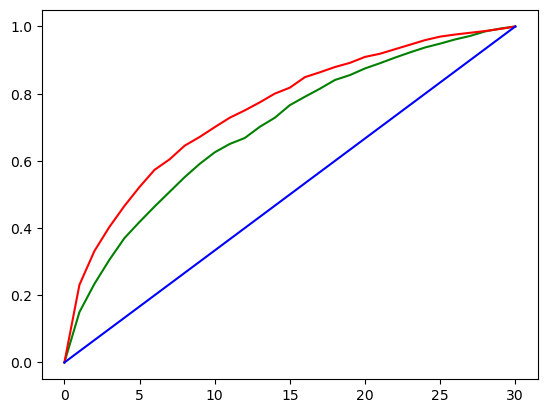

In [6]:
# Calculate the gains based on the predicted response rate
gains_lr = mba263.gain(data['res1'],data['p_logr'],bins=30)
gains_nn = mba263.gain(data['res1'],data['p_nn'],bins=30)

# Plot the table 
plt.plot(gains_lr,'g')
plt.plot(gains_nn,'r')
plt.plot([0,30],[0,1],'b')

## N2. Evaluate Mailing Strategy

In [9]:
# Predicted response rate is half the first response rate
data['p_res2']=data['res1']/2

# Determine target customers for mailing
breakeven = 0.0235
data['second_mail'] = 1*(data['p_res2']>=breakeven)&(data['res1']==0)

# Calculate the number of customers to mail
len_second_mail = len(data[data['second_mail']==1])

# Calculate the profits from the mailing
mail_cost = 1.41
profit_per_customer = 60
profit_second_mail = (profit_per_customer*data[(data['second_mail'] == 1)]['p_res2'].mean()*len_second_mail)-(mail_cost*len_second_mail)
print(profit_second_mail)

nan
